In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import os
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] # 用黑体显示中文
def toMarkdown(s):
    l=s.split('e')
    return l[0]+'\times10^{'+l[1]+'}'

## 1.单摆测量重力加速度
平均数 A类不确定度

In [6]:
df = pd.read_csv('单摆.csv',index_col=0,header=0)
a=[0]*3
b=[0]*3
k=0
for i in df.index:
    for j in df.columns:
        a[k]+=df.loc[i][j]/5.0
    k+=1
   
k=0
for i in df.index:
    for j in df.columns:
        b[k]+=(df.loc[i][j]-a[k])**2/20
    k+=1
print(a)
for i in range(3):
    b[i]=b[i]**0.5*2.78
print(b)
#计算A类不确定度 平均数

[np.float64(20.016), np.float64(71.96600000000001), np.float64(85.72200000000001)]
[np.float64(0.011119999999999764), np.float64(0.05019420683704431), np.float64(0.06302695931108011)]


## 2.时间测量中随机误差的分布规律
基础数据

In [7]:
def P(x,a_bar,sigma):
    return 1/(math.sqrt(2*math.pi)*sigma)*math.exp(-(x-a_bar)**2/(2*(sigma**2)))

f=open('时间.in','r')
n=200
a=[0]*(n+10)
mn=10
mx=0
a_bar=0
for i in range(1,n+1):
    a[i]=float(f.readline())
    mn=min(a[i],mn)
    mx=max(a[i],mx)
    a_bar+=a[i]/n
print('平均值:',a_bar)
print('最大值:',mx)
print('最小值:',mn)
sigma=sum([(a[i]-a_bar)**2 for i in range(1,n+1)])/(n-1)
sigma=sigma**0.5
print('方差:',sum([(a[i]-a_bar)**2 for i in range(1,n+1)])/(n-1))
print('标准差:',sigma)
print('极差:',mx-mn)


平均值: 3.0937999999999994
最大值: 3.48
最小值: 2.76
方差: 0.01828498492462312
标准差: 0.13522198388066609
极差: 0.7200000000000002


计算分段 统计频率

In [ ]:
# pf=pd.DataFrame(a[1:n+1])
b=[0]*14
b[0]=2.76+0.03
print("[",toMarkdown(format(b[0]-0.03,'.2f'),",",toMarkdown(format(b[0]+0.03,'.2f'),'],',end='')
for i in range(1,13):
    b[i]=b[i-1]+0.06
    print("(",toMarkdown(format(b[i]-0.03,'.2f'),",",toMarkdown(format(b[i]+0.03,'.2f'),'],',end='')

cnt=[0]*14
p=[0]*14
sigm=[0]*4
for i in range(1,n+1):
    for j in range(12):
        if b[j]-0.03<a[i]<=b[j]+0.03:
            cnt[j]+=1
        if b[j]-0.03==a[i] and j==0:
            cnt[j]+=1

for i in range(12):#下一行输出markdown表格格式
    print("|$(",toMarkdown(format(b[i]-0.03,'.2f'),",",toMarkdown(format(b[i]+0.03,'.2f'),']$|$',
          cnt[i],'$|$',toMarkdown(format(cnt[i]/n,'.2f'),'$|$',toMarkdown(format(cnt[i]/(n*0.06),'.2f'),
          '$|$',toMarkdown(format(P(b[i],a_bar,sigma),'.2f'),'$|')

f.close()



[ 2.76 , 2.82 ],( 2.82 , 2.88 ],( 2.88 , 2.94 ],( 2.94 , 3.00 ],( 3.00 , 3.06 ],( 3.06 , 3.12 ],( 3.12 , 3.18 ],( 3.18 , 3.24 ],( 3.24 , 3.30 ],( 3.30 , 3.36 ],( 3.36 , 3.42 ],( 3.42 , 3.48 ],( 3.48 , 3.54 ],|$( 2.76 , 2.82 ]$|$ 3 $|$ 0.01 $|$ 0.25 $|$ 0.24 $|
|$( 2.82 , 2.88 ]$|$ 2 $|$ 0.01 $|$ 0.17 $|$ 0.58 $|
|$( 2.88 , 2.94 ]$|$ 14 $|$ 0.07 $|$ 1.17 $|$ 1.17 $|
|$( 2.94 , 3.00 ]$|$ 16 $|$ 0.08 $|$ 1.33 $|$ 1.94 $|
|$( 3.00 , 3.06 ]$|$ 19 $|$ 0.10 $|$ 1.58 $|$ 2.64 $|
|$( 3.06 , 3.12 ]$|$ 16 $|$ 0.08 $|$ 1.33 $|$ 2.95 $|
|$( 3.12 , 3.18 ]$|$ 21 $|$ 0.10 $|$ 1.75 $|$ 2.71 $|
|$( 3.18 , 3.24 ]$|$ 18 $|$ 0.09 $|$ 1.50 $|$ 2.04 $|
|$( 3.24 , 3.30 ]$|$ 22 $|$ 0.11 $|$ 1.83 $|$ 1.26 $|
|$( 3.30 , 3.36 ]$|$ 5 $|$ 0.03 $|$ 0.42 $|$ 0.64 $|
|$( 3.36 , 3.42 ]$|$ 2 $|$ 0.01 $|$ 0.17 $|$ 0.27 $|
|$( 3.42 , 3.48 ]$|$ 3 $|$ 0.01 $|$ 0.25 $|$ 0.09 $|


统计$\sigma$分布

In [9]:
for i in range(12):
    cnt[i]=cnt[i]/(n*0.06)
    p[i]=P(b[i],a_bar,sigma)
for i in range(1,n+1):
    for j in range(1,4):
        if(abs(a[i]-a_bar)<=j*sigma):
            sigm[j]+=1
for i in range(1,4):
    print(i,sigm[i],sigm[i]/n)
print('A类不确定度:',sigma*1.96/(n**0.5))
#pf.to_csv('时间.csv')


1 133 0.665
2 191 0.955
3 200 1.0
A类不确定度: 0.01874081082643333


画图

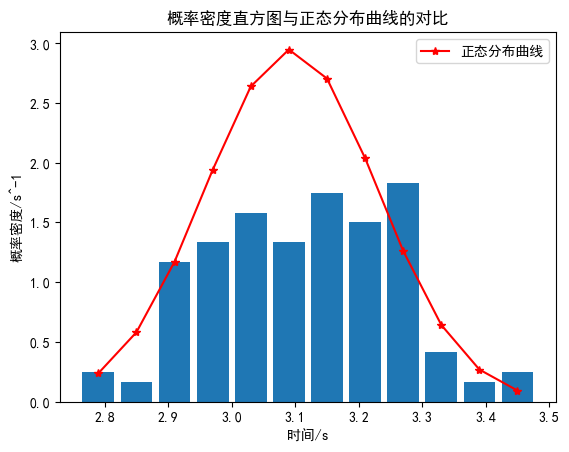

In [10]:
plt.bar(b[0:12],cnt[0:12],width=0.05)
plt.plot(b[0:12],p[0:12],color='red',label='正态分布曲线',marker='*')
plt.xlabel('时间/s')
plt.ylabel('概率密度/s^-1')
plt.title('概率密度直方图与正态分布曲线的对比')
plt.legend()
plt.show()

## 3.密立根油滴实验


基础数据处理

In [ ]:
f=open('密立根.in','r')
n=5
t=[0]*(n+10)
U=[0]*(n+10)
for i in range(1,n+1):
    s=f.readline().split()
    print(s)
    U[i]=float(s[0])
    t[i]=float(s[1])+float(s[2])+float(s[3])
    t[i]=t[i]/3.0
    print("|$",i,"$|$",U[i],"$|$",s[1],"$|$",s[2],"$|$",s[3],"$|$",toMarkdown(toMarkdown(format(t[i],'.2e'),"$|")
f.close()
e0=1.602e-19
q=[0]*(n+10)
m=[0]*(n+10)
e=[0]*(n+10)
e_bar=0
for i in range(1,n+1):
    q[i]=1.022e-14/(U[i]*((1+0.02193*t[i]**0.5)*t[i])**1.5)
    m[i]=round(q[i]/e0)
    e[i]=q[i]/m[i]
    e_bar+=e[i]
    print("=\\frac{1.022\\times 10^{-14}}{",toMarkdown(toMarkdown(format(U[i],'.2e'),"\\times[(1+0.02193\\sqrt{",toMarkdown(format(t[i],'.2e'),"})",toMarkdown(toMarkdown(format(t[i],'.2e'),"]^{3 \\over 2}}=",toMarkdown(toMarkdown(format(q[i],'.2e'))
    print("=[\\frac{",toMarkdown(toMarkdown(format(q[i],'.2e')),"}{",toMarkdown(format(e0,'.2e'),"}]\\approx",toMarkdown(format(m[i],'.2e'))
    print("=\\frac{",toMarkdown(toMarkdown(format(q[i],'.2e')),"}{",toMarkdown(format(m[i],'.2e'),"}=",toMarkdown(format(e[i],'.2e'))
e_bar=e_bar/n
print('平均值:',e_bar)
print('误差',abs(e_bar-e0)/e0*100,'%')

['170', '20.5', '20.5', '20.6']
|$ 1 $|$ 170.0 $|$ 20.5 $|$ 20.5 $|$ 20.6 $|$ 2.05e+01 $|
['180', '17.5', '17.5', '17.6']
|$ 2 $|$ 180.0 $|$ 17.5 $|$ 17.5 $|$ 17.6 $|$ 1.75e+01 $|
['191', '16.4', '16.7', '16.6']
|$ 3 $|$ 191.0 $|$ 16.4 $|$ 16.7 $|$ 16.6 $|$ 1.66e+01 $|
['200', '15.5', '15.5', '15.6']
|$ 4 $|$ 200.0 $|$ 15.5 $|$ 15.5 $|$ 15.6 $|$ 1.55e+01 $|
['210', '14.7', '14.7', '14.8']
|$ 5 $|$ 210.0 $|$ 14.7 $|$ 14.7 $|$ 14.8 $|$ 1.47e+01 $|
=\frac{1.022\times 10^{-14}}{ 1.70e+02 \times[(1+0.02193\sqrt{ 2.05e+01 }) 2.05e+01 ]^{3 \over 2}}= 5.61e-19
=[\frac{ 5.61e-19 }{ 1.60e-19 }]\approx 3.00e+00
=\frac{ 5.61e-19 }{ 3.00e+00 }= 1.87e-19
=\frac{1.022\times 10^{-14}}{ 1.80e+02 \times[(1+0.02193\sqrt{ 1.75e+01 }) 1.75e+01 ]^{3 \over 2}}= 6.78e-19
=[\frac{ 6.78e-19 }{ 1.60e-19 }]\approx 4.00e+00
=\frac{ 6.78e-19 }{ 4.00e+00 }= 1.69e-19
=\frac{1.022\times 10^{-14}}{ 1.91e+02 \times[(1+0.02193\sqrt{ 1.66e+01 }) 1.66e+01 ]^{3 \over 2}}= 6.98e-19
=[\frac{ 6.98e-19 }{ 1.60e-19 }]\approx 4.0